# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>


There exists a large variety of options in the financial world. One of the most common is the so-called **european option**. Here, the writer sells the option to a holder that has the right to purchase (=call option) or sell (=put option) the underlying good for a prescribed price $K$ at a predefined expiry data $T$ in the future. It arises the question, how much the option should cost. We assume that the development of the market value $S(t)$ of the underlying good can be described by **geometric Brownian motion**, a specific stochastic process denoted by $S \sim GBM(\mu, \sigma^2)$. In our case, $\mu$, the so-called drift, describes the general increasement of the market value, where $\sigma$ implements the volatility of $S(t)$. 
Thus, a european option is characterized by the following parameters:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$.

Obviously, these parameters can take abitrary values. Here, we state the values we will use for this exercise.

The main question is: **What should be the price of a european option?** Theoretically, the price is given by:

$$C\left[ S(T),T \right] = \exp(-rT) \max(0, S(T) - K) \\
P\left[ S(T),T \right] = \exp(-rT) \max(0, K - S(T)), $$

for call and put option, respectively, where $\exp(rT)$ is the so-called discount factor due to the interest that a bank would have guaranteed.

So, the problem has been reduced to find a way to **predict the market value $S(T)$ at the expiry time**.

An analytical way to do so, is the so-called **Black-Scholes model**, see exercise description for more details. For the parameters above, the computation outputs the prices below for both option types. We can use these prices as the correct solution with regard to the assumption that the market value development can be described by a geometrical Brownian motion with a time-independent drift $\mu$ (here $r$) and volatility $\sigma$.

In [23]:
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


The option price can also be estimated by using a Monte Carlo simulation. Here, we have two possibilities:

1. **Direct calculation of $S(T)$**: In this case, we calculate the relevant market value at the expiry date directly. For this purpose, we use the following approach:
$$S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right],$$
where $Z_i \sim \mathcal{N}(0,1)$. The random numbers are sampled using the Rannyu generator in combination with a Box-Müller transformation. 
In the figure below, we visualize a progressive mean of the simulation of the call and the put option price as a function of the throws $M$ with $M_{max} = $. We use the blocking method with $N = $ blocks to estimate the uncertainties on the option price simulations.
We observe that the simulation converges to the option prices obtained by the Black-Scholes calculation.

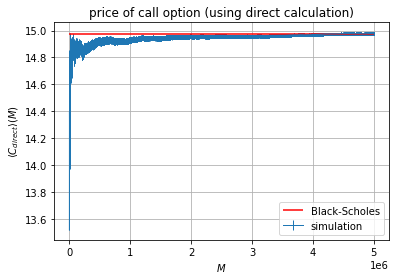

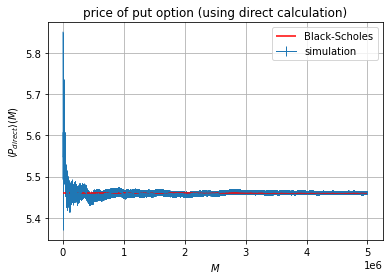

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
M, C_direct, C_direct_error = np.loadtxt("data/C_direct_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, C_direct, C_direct_error, lw=1, label='simulation')
plt.hlines(call, min(M), max(M), color='r', label='Black-Scholes')
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle C_{direct} \rangle(M)$")
plt.title("price of call option (using direct calculation)")
plt.legend()
plt.grid()

plt.figure()
M, P_direct, P_direct_error = np.loadtxt("data/P_direct_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, P_direct, P_direct_error, lw=1, label='simulation')
plt.hlines(put, min(M), max(M), color='r', label='Black-Scholes')
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle P_{direct} \rangle(M)$")
plt.title("price of put option (using direct calculation)")
plt.legend()
plt.grid()

plt.show()

2. **Discretized calculation of $S(T)$**: Here, we split the time interval $[0, T]$ into $100$ subintervals and calculate $S(T) = S(t_100)$ via caclulation of $S(t_1), S(t_2),...$ using:
$$ S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right], $$
where $Z_i \sim \mathcal{N}(0,1)$. 
The results are displayed below.

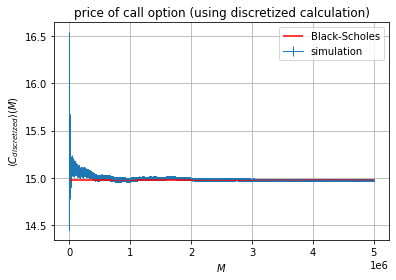

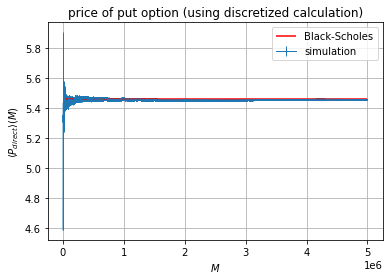

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
M, C_discretized, C_discretized_error = np.loadtxt("data/C_discretized_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, C_discretized, C_discretized_error, lw=1, label='simulation')
plt.hlines(call, min(M), max(M), color='r', label='Black-Scholes')
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle C_{discretized} \rangle(M)$")
plt.title("price of call option (using discretized calculation)")
plt.legend()
plt.grid()

plt.figure()
M, P_discretized, P_discretized_error = np.loadtxt("data/P_discretized_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, P_discretized, P_discretized_error, lw=1, label='simulation')
plt.hlines(put, min(M), max(M), color='r', label='Black-Scholes')
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle P_{direct} \rangle(M)$")
plt.title("price of put option (using discretized calculation)")
plt.legend()
plt.grid()

plt.show()